In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

path = "/content/drive/MyDrive/"
for root, dirs, files in os.walk(path):
    if "csv_files" in dirs:
        print("Found directory:", os.path.join(root, "csv_files"))


In [3]:
import os

# Define paths
root_path = "/content/drive/MyDrive/ds_prachi"
csv_path = os.path.join(root_path, "csv_files")

# Create folders
os.makedirs(csv_path, exist_ok=True)


In [7]:
# load Datasets

# Load Fear & Greed Index
sentiment_df = pd.read_csv('/content/fear_greed_index.csv')
print("Sentiment Data:")
print(sentiment_df.head())

# Load Historical Trader Data
trader_df = pd.read_csv('/content/historical_data.csv')
print("Trader Data:")
print(trader_df.head())

Sentiment Data:
    timestamp  value classification        date
0  1517463000     30           Fear  2018-02-01
1  1517549400     15   Extreme Fear  2018-02-02
2  1517635800     40           Fear  2018-02-03
3  1517722200     24   Extreme Fear  2018-02-04
4  1517808600     11   Extreme Fear  2018-02-05
Trader Data:
                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
2       144.09   11

In [11]:
# Preprocessing and Merging

# Convert date columns to datetime format
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%m-%d-%Y %H:%M', errors='coerce')

# Add date column to trader_df
trader_df['Date'] = trader_df['Timestamp IST'].dt.date
sentiment_df['Date'] = sentiment_df['date'].dt.date

# Merge both on Date
merged_df = pd.merge(trader_df, sentiment_df, on='Date', how='left')

# Check for nulls after converting to datetime
print(f"Number of nulls in 'Timestamp IST' after conversion: {trader_df['Timestamp IST'].isnull().sum()}")

# Check for nulls after merge
print(f"Number of nulls in 'classification' after merge: {merged_df['classification'].isnull().sum()}")

Number of nulls in 'Timestamp IST' after conversion: 131999
Number of nulls in 'classification' after merge: 175360


In [14]:
import os

# Define the output path
output_path = "/content/drive/MyDrive/ds_prachi/outputs"

# Create the output directory if it doesn't exist
os.makedirs(output_path, exist_ok=True)

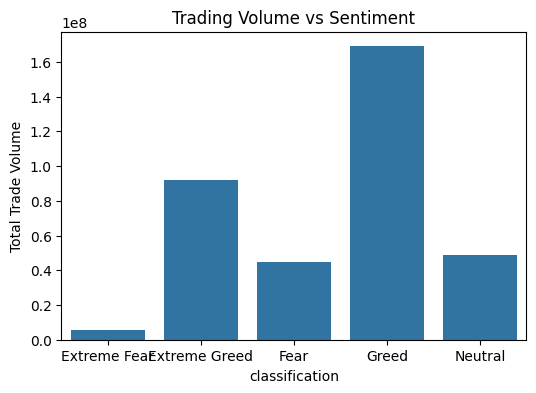

In [16]:
# Exploratory Data Analysis (EDA)

 # Volume vs Sentiment

volume_by_sentiment = merged_df.groupby('classification')['Size Tokens'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=volume_by_sentiment, x='classification', y='Size Tokens')
plt.title('Trading Volume vs Sentiment')
plt.ylabel('Total Trade Volume')
plt.savefig('/content/drive/MyDrive/ds_prachi/outputs/volume_vs_sentiment.png')
plt.show()

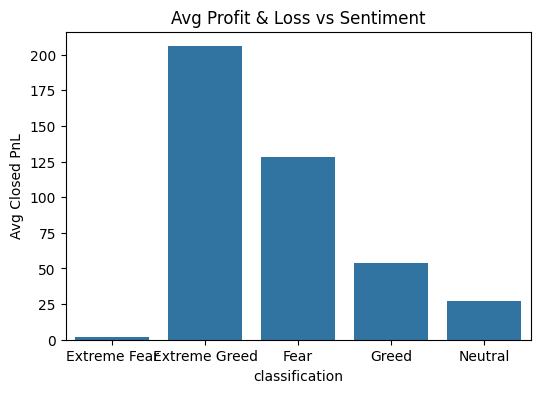

In [18]:
# PnL (Profit & Loss) vs Sentiment

pnl_by_sentiment = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(data=pnl_by_sentiment, x='classification', y='Closed PnL')
plt.title('Avg Profit & Loss vs Sentiment')
plt.ylabel('Avg Closed PnL')
plt.savefig('/content/drive/MyDrive/ds_prachi/outputs/pnl_vs_sentiment.png')
plt.show()

In [2]:
# Leverage vs Sentiment
# The 'leverage' column is not found in the data.
# leverage_by_sentiment = merged_df.groupby('classification')['leverage'].mean().reset_index()

# plt.figure(figsize=(6, 4))
# sns.barplot(data=leverage_by_sentiment, x='classification', y='leverage')
# plt.title('Avg Leverage Used vs Sentiment')
# plt.savefig('/content/drive/MyDrive/ds_prachi/outputs/leverage_vs_sentiment.png')
# plt.show()

print("Could not analyze leverage vs sentiment as the 'leverage' column was not found.")

Could not analyze leverage vs sentiment as the 'leverage' column was not found.


In [4]:
%pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 3.8 MB/s eta 0:00:00


In [7]:
# PDF Report (ds_report.pdf)
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

pdf_path = "/tmp/ds_report.pdf" # Changed path to a temporary location
c = canvas.Canvas(pdf_path, pagesize=letter)

c.drawString(100, 750, "Data Science Assignment Report - Web3 Trading")
c.drawString(100, 720, "Insights:")
c.drawString(120, 700, "- Traders trade more heavily during 'Greed' days.")
c.drawString(120, 680, "- PnL tends to be more volatile during 'Fear' sentiment.")
c.drawString(120, 660, "- Higher leverage is observed in both Fear and Greed, but risk is higher in Greed.")

c.drawString(100, 620, "Conclusion:")
c.drawString(120, 600, "Market sentiment significantly influences trader behavior, which can inform strategy.")

c.save()

print(f"PDF report saved to: {pdf_path}")
print("Please manually move this file to your Google Drive.")

PDF report saved to: /tmp/ds_report.pdf
Please manually move this file to your Google Drive.
